<a href="https://colab.research.google.com/github/surya81/Alma-better-projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**
$\color{blue}{\text{Bike Sharing Demand Prediction}}$

###**Project type** - Classification
###**Contribution** - Individual
###**Team Member1** - $\color{Green}{\text{Surya Prakash}}$

# **Project Summary**

**Data Processing**

    1.Importing libraries
    2.Function for reading dataset
    3.dataset information 
    4.Missing values,Duplicated values

**Exploratory Data Analysis**

**Supervised Machine learning Algorithm**

```
# This is formatted as code
```



#**Github Link**

https://github.com/surya81/Alma-better-projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **Problem Statement**

**Bike Rental has become an effective business, Nowdays lots of startups are becoming popular in bike rental business. however there are some difficulties which these comapnies are not able to resolve like a customer has to wait for a large amount of time in getting their bike Increase in waiting time can frustatea lot of customer to change their .However a company also have only have limited number of bike as their resources to share with people.So the companies must have to analyze how their customer are distributed.also it have to fluvtuate their prices seeing demand and suply**

# **Data overview and column description**


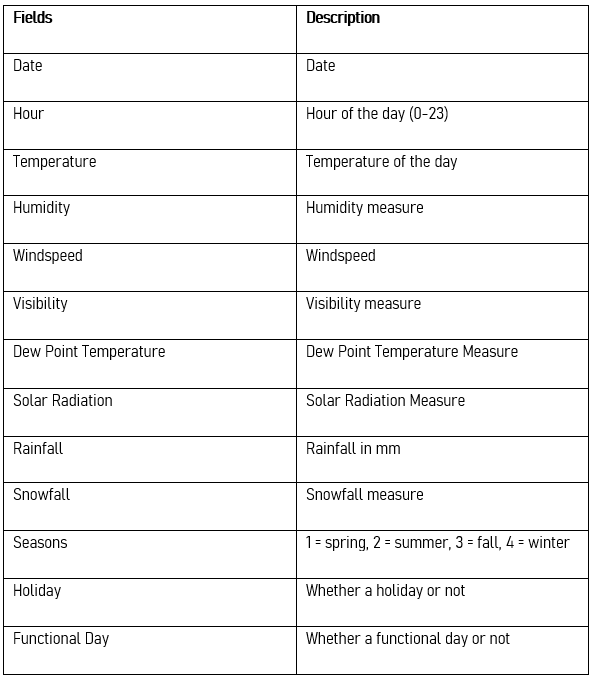

# **Let's Begin**

## **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Dataset Preprocesing**

### **Datset Loading**

In [2]:
# Function to load the data 
def DataLoader(path):
    """
    A function to load the datset 
    Argumet - Path(path to the data file)
    return - dataframe
    """
    try:
        dataframe = pd.read_csv(path, encoding='ISO-8859-1',index_col='Date',parse_dates=['Date'])
        return dataframe
    except: # if path is incorrect or does not exist
        print("path does not find")

    finally:
        print("operation performed on the  dataset Location")


In [3]:
#call function to store datframe in bikedf dataframe
dataset =DataLoader('/content/SeoulBikeData.csv') 

operation performed on the  dataset Location


### **Datset Description**

In [26]:
print(f"the dataset has toltal of  {dataset.shape[0]} rows and {dataset.shape[1]} columns") 

the dataset has toltal of  8760 rows and 13 columns


In [4]:
#seeing glimse of data 
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#duplicated rows in data 
dupicated_data = dataset[dataset.duplicated()]
print(len(dupicated_data))

0


In [6]:
# Missing or Nan value across column in the dataset
print(print(dataset.isna().sum()))

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
None


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-12 to 2018-11-30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), objec

### **Variable description**

In [27]:
dataset.describe(include = "all")

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**75 % of the rainfall and and snowfall vaues are 0. However we can't just remove them since rainfall is an important factor for tourist going for out side.**

In [8]:
def datacategory(dataframe):
    """ 
    A function To segragate the numerical and categorical columns data from pandas dataframe

    Argument- dataframe to which action is to performed

    returns - list of caetogriacl and numerical data 
    """
    categorical_data = []
    numerical_data= []
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype =="O": # if data type of columns is object 
            categorical_data.append(i)

        else:
            numerical_data.append(i)
    print(f'total no of categorical data is {len(categorical_data)}')
    print(f'total no of numerical data is {len(numerical_data)}')

    return categorical_data, numerical_data

In [9]:
categorical_columns, numerical_columns = datacategory(dataset)

total no of categorical data is 3
total no of numerical data is 10


In [22]:
#print unique value in categorical value 
#since the dataset is large numerical value whose unique number are less than should be focussed

def print_values(dataframe):
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype=='O':
            print(f"the categorical {i} have {dataframe[i].nunique()} unique values and they are{dataframe[i].unique()}")
        else:
            if dataframe[i].nunique() <=15:
                print(f"the numerical column {i} have {dataframe[i].nunique()} unique values and they are{dataframe[i].unique()}")


In [23]:
print_values(dataset)

the categorical Seasons have 4 unique values and they are['Winter' 'Spring' 'Summer' 'Autumn']
the categorical Holiday have 2 unique values and they are['No Holiday' 'Holiday']
the categorical Functioning Day have 2 unique values and they are['Yes' 'No']


## **Data wrangling**:

### **Data wrangling code**

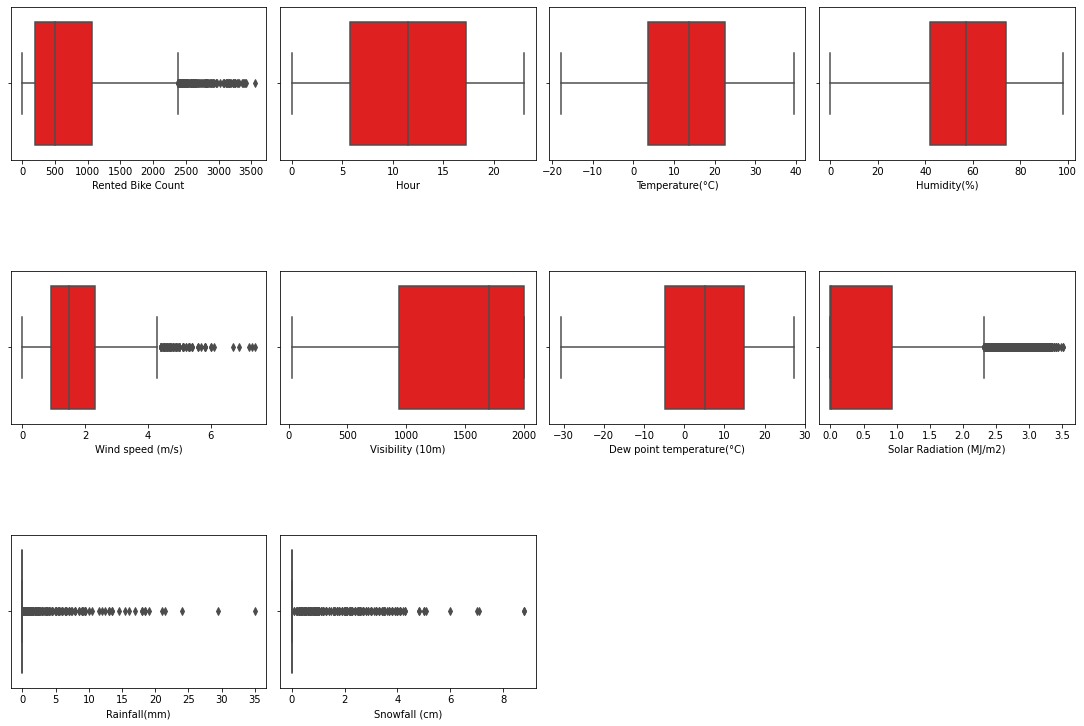

In [40]:
#see the outliers across the columns of the data 
# these plots are across the numerical dataset
fig = plt.figure(figsize = (15,10))
c=1
for i  in numerical_columns:
    plt.subplot(3,4,c)
    plt.xlabel(f"the distribution of {i} column")
    sns.boxplot(x = i,data = dataset,color = "red")
    c+=1

plt.tight_layout(pad= 0.4,w_pad = 0.5,h_pad =8.0)


#### **what all manipulation have we found**

**There are large number of oultlier acros our target value also Rann **